In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
features = pd.read_excel('优化后数据集合.xlsx')
label1 = np.array(features['循环应力'])
features = features.drop(['循环应力', '失效反向数'], axis=1)

# 定义MAPE函数
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建SVR模型并设置参数 
model_svr = SVR(kernel='rbf', C=5000, gamma=1,epsilon=0.1)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_svr = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_svr.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_svr.predict(data_x4[test_index])
    r2_svr.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_svr)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_svr = cross_val_predict(model_svr, data_x4, data_y4, cv=crossvalidation)

# 计算MAPE
mape = mape_function(y_cv2_svr, data_y4)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


10折交叉验证平均R2值: 0.95
10折交叉验证平均MAPE值: 4.37


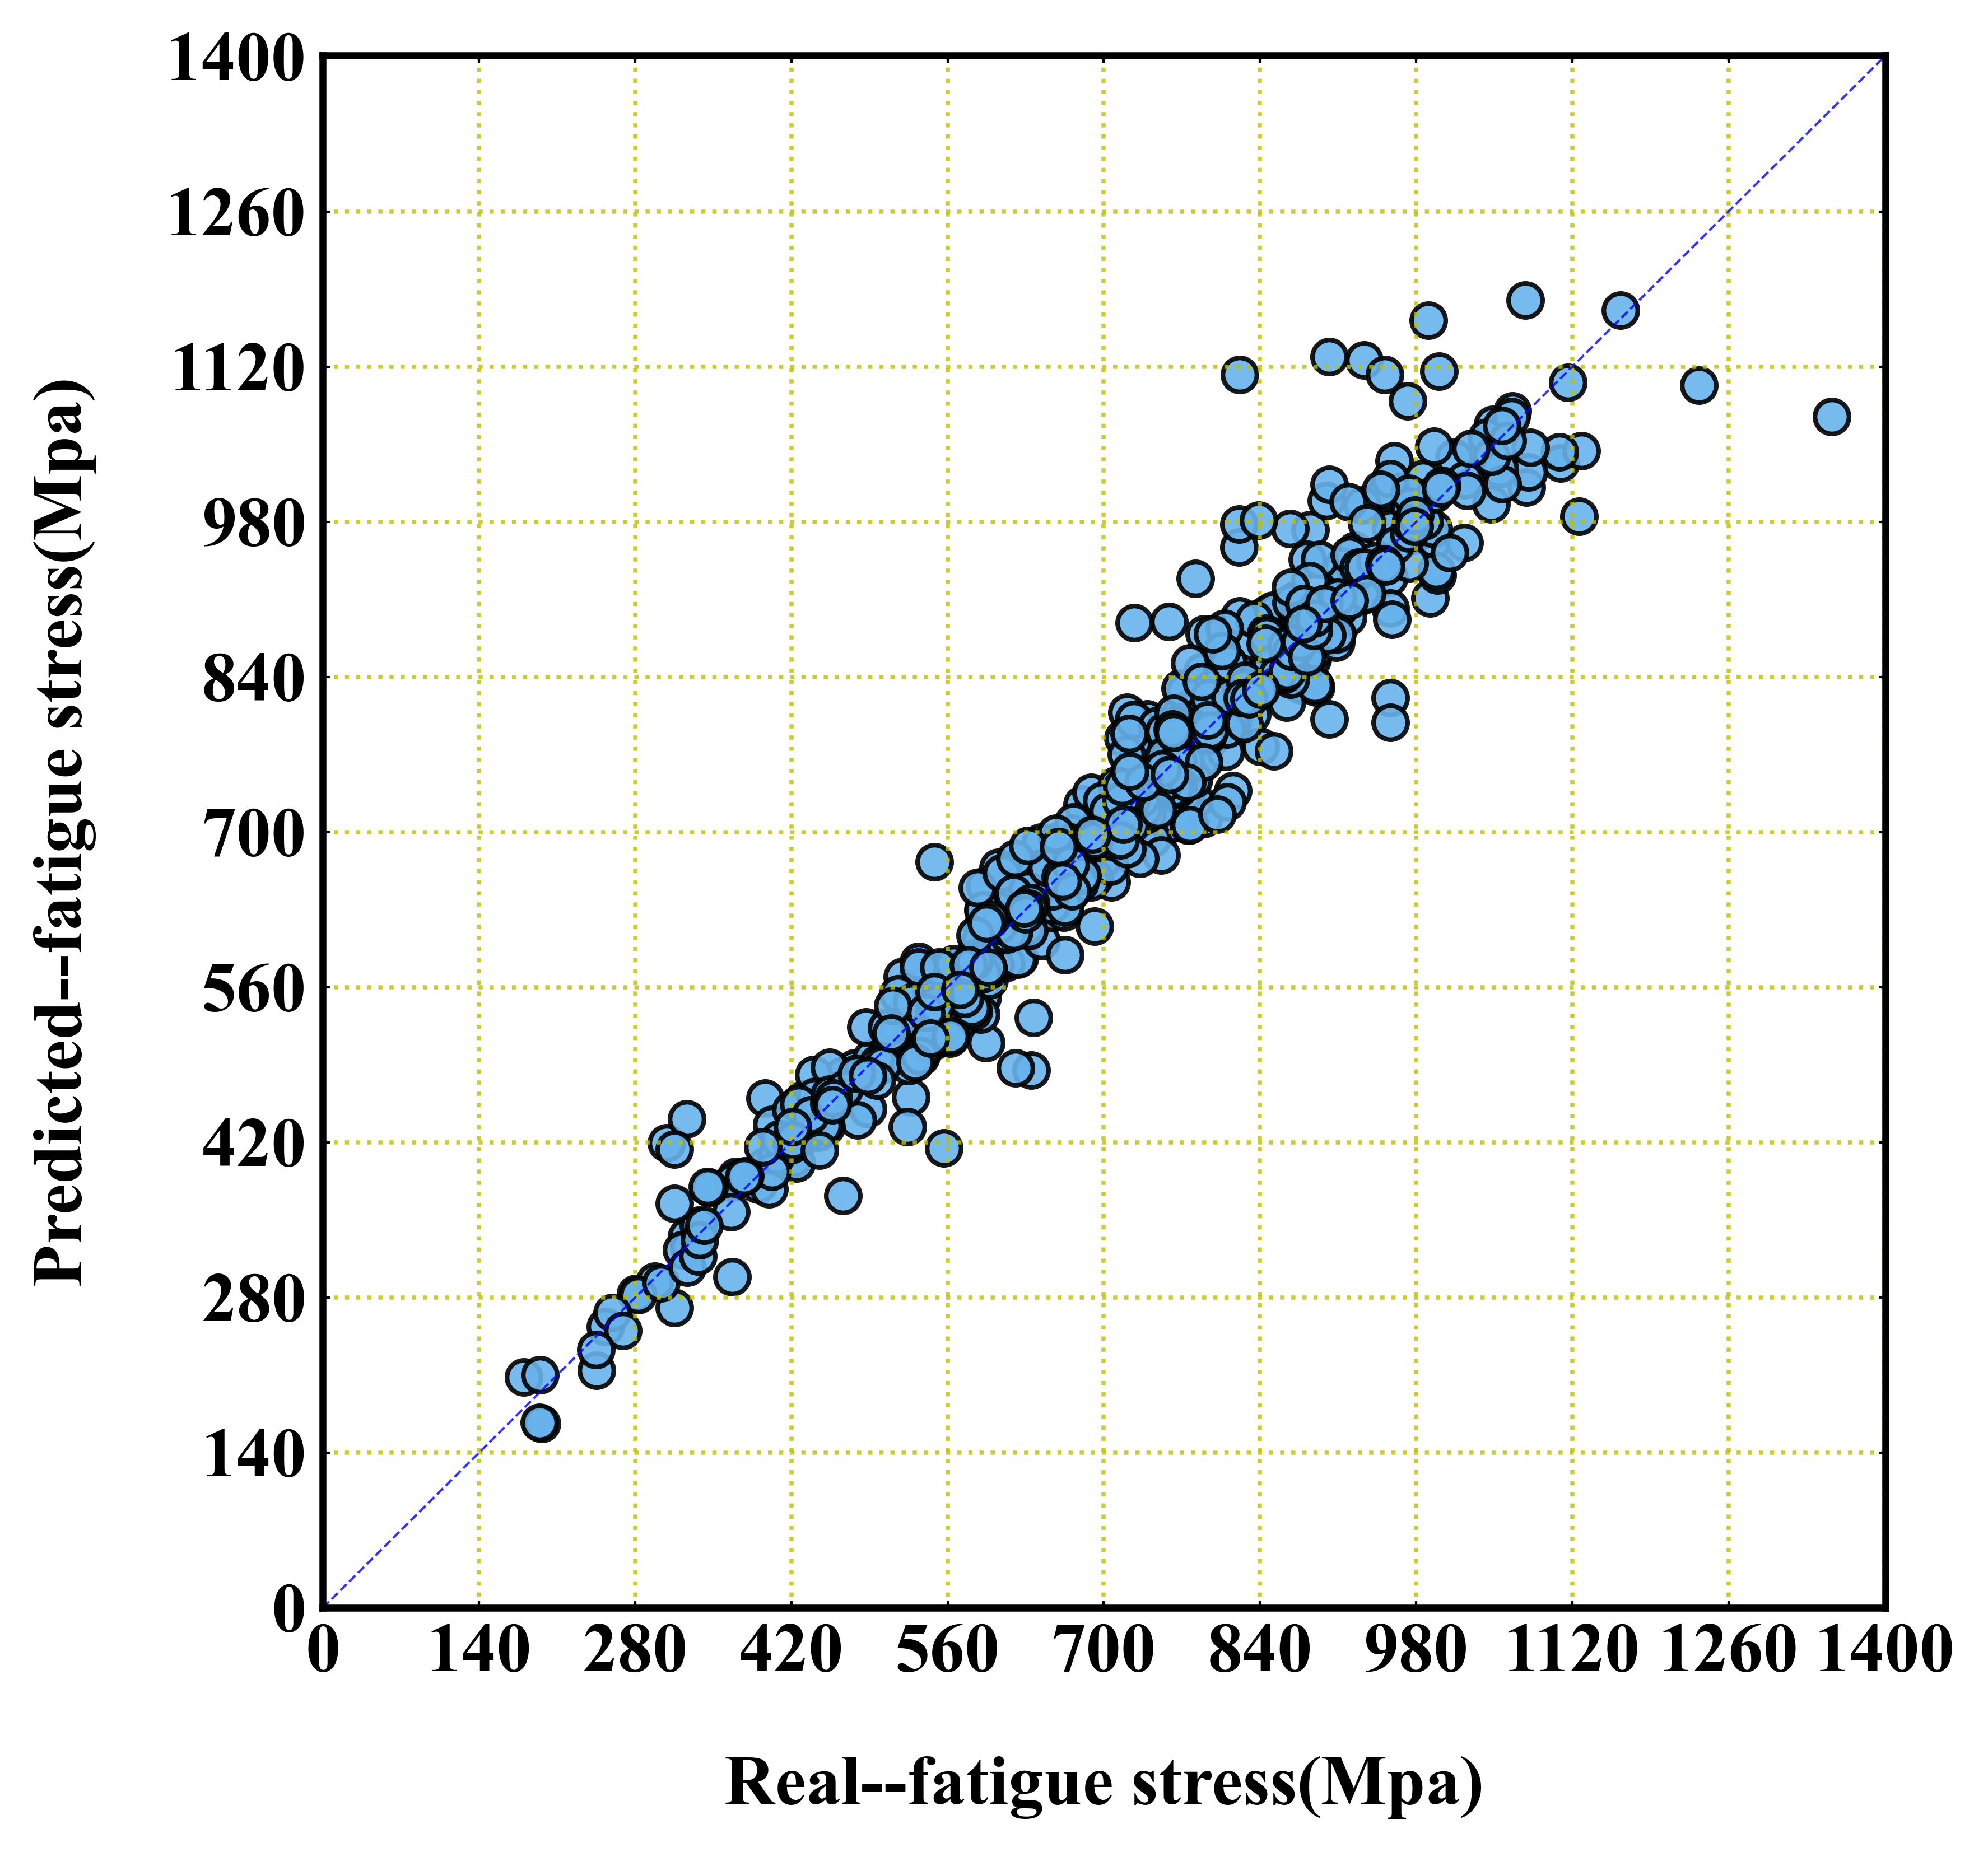

In [3]:
import matplotlib.pyplot as plt
# 设置绘图参数
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color

new_ticks = list(np.arange(0, 1401, 140))
plt.xticks(new_ticks, fontsize=15,weight='bold',fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=15,weight='bold',fontname='Times New Roman')
# 绘制散点图
plt.scatter(y_cv2_svr, data_y4, alpha=0.9, s=53, linewidths=1.0, c='#68B3EC',
            edgecolor='#000000', marker='o')
plt.plot([0, 1401], [0, 1401], 'b--', linewidth='0.5', alpha=0.8)
plt.ylim(0, 1401)
plt.xlim(0, 1401)

# 显示绘图
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.xlabel('Real--fatigue stress(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.ylabel('Predicted--fatigue stress(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.show()